<a href="https://colab.research.google.com/github/MaliniVibin1502/pythonprojects/blob/main/MedicalDataVisualise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This was a challenge from Freecodecamp course Data Analysis using Python.The challenege included a dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices. 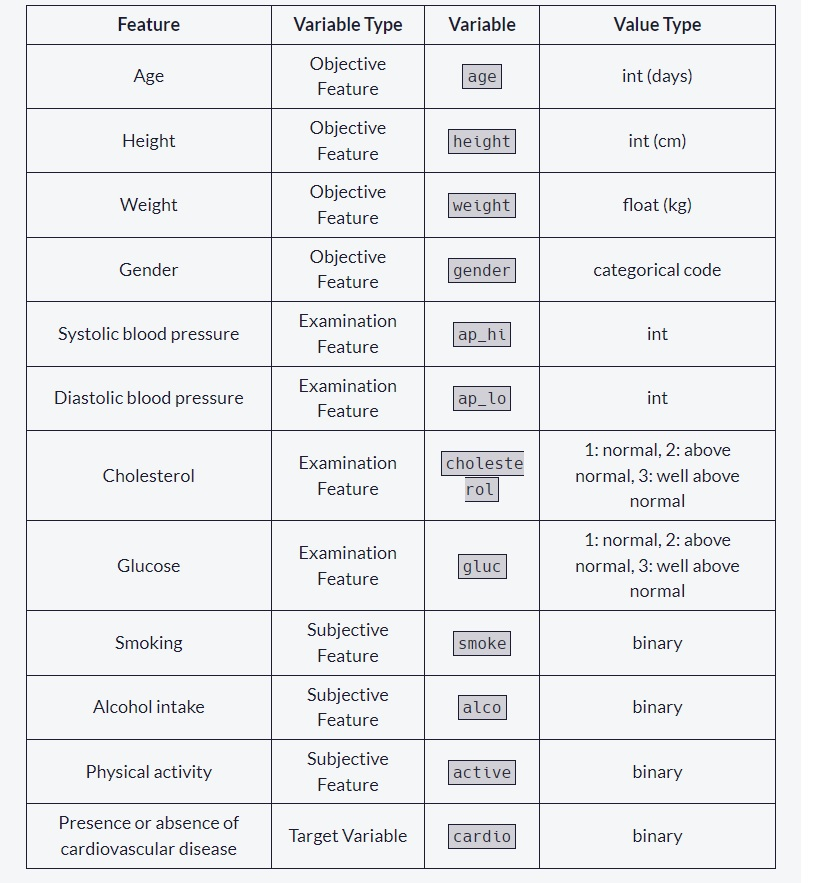

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [ ]:
med = pd.read_csv("https://raw.githubusercontent.com/MaliniVibin1502/freecodecampprojects/main/medical_examination.csv")
med.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Task - Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [ ]:
med['overweight'] = (med['weight']/(med['height']/100)**2 > 25).astype(int)
med[['age', 'overweight']]

,age,overweight
0,18393,0
1,20228,1
2,18857,0
3,17623,1
4,17474,0
...,...,...
69995,19240,1
69996,22601,1
69997,19066,1
69998,22431,1


In [ ]:
med['age']=med['age']/365.24
med['age']

0        50.358668
1        55.382762
2        51.629066
3        48.250465
4        47.842515
           ...    
69995    52.677691
69996    61.879860
69997    52.201292
69998    61.414412
69999    56.236995
Name: age, Length: 70000, dtype: float64

Task - Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [ ]:
med['cholesterol'] = (med['cholesterol']>1).astype(int)
med['gluc']=(med['gluc']>1).astype(int)
med[['age', 'cholesterol','gluc']]

,age,cholesterol,gluc
0,50.358668,0,0
1,55.382762,1,0
2,51.629066,1,0
3,48.250465,0,0
4,47.842515,0,0
...,...,...,...
69995,52.677691,0,0
69996,61.879860,1,1
69997,52.201292,1,0
69998,61.414412,0,1


Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value

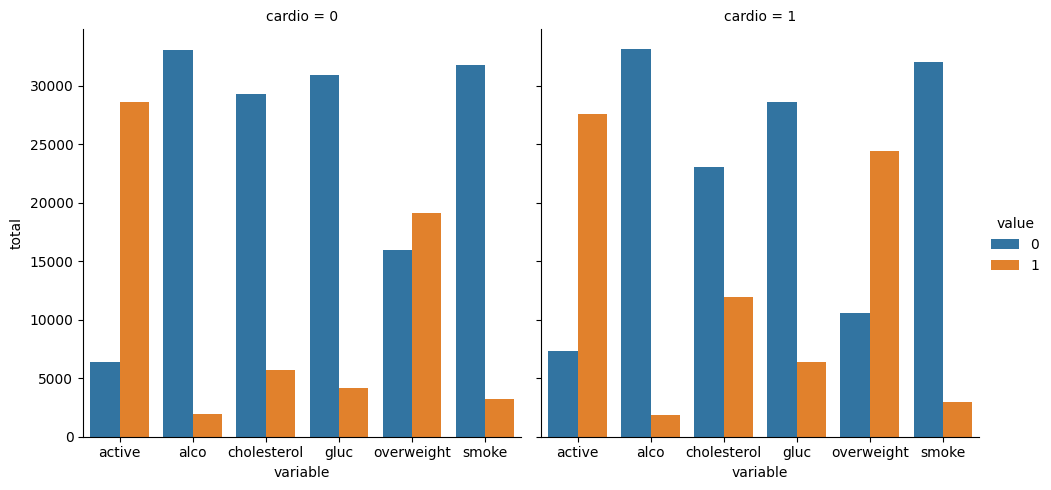

In [ ]:
med_cat = pd.melt(med, id_vars=['cardio'],
                     value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
med_cat = med_cat.groupby(['cardio', 'variable', 'value']).size().reset_index()
med_cat = med_cat.rename(columns={0: 'total'})
graph = sb.catplot(data=med_cat, kind="bar", x="variable", y="total", hue="value", col="cardio")
fig = graph.fig

Clean the data. Filter out the following patient segments that represent incorrect data:
diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))

height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))


height is more than the 97.5th percentile

weight is less than the 2.5th percentile

weight is more than the 97.5th percentile

Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle.

In [ ]:
med_clean = med[(med['ap_lo'] <= med['ap_hi']) &
                 (med['height'] >= med['height'].quantile(0.025)) &
                 (med['height'] <= med['height'].quantile(0.975)) &
                 (med['weight'] >= med['weight'].quantile(0.025)) &
                 (med['weight'] <= med['weight'].quantile(0.975))
                 ]
corre = med_clean.corr()
corre

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
gender,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [ ]:
mask = np.triu(np.ones_like(corre, dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         

<Axes: >

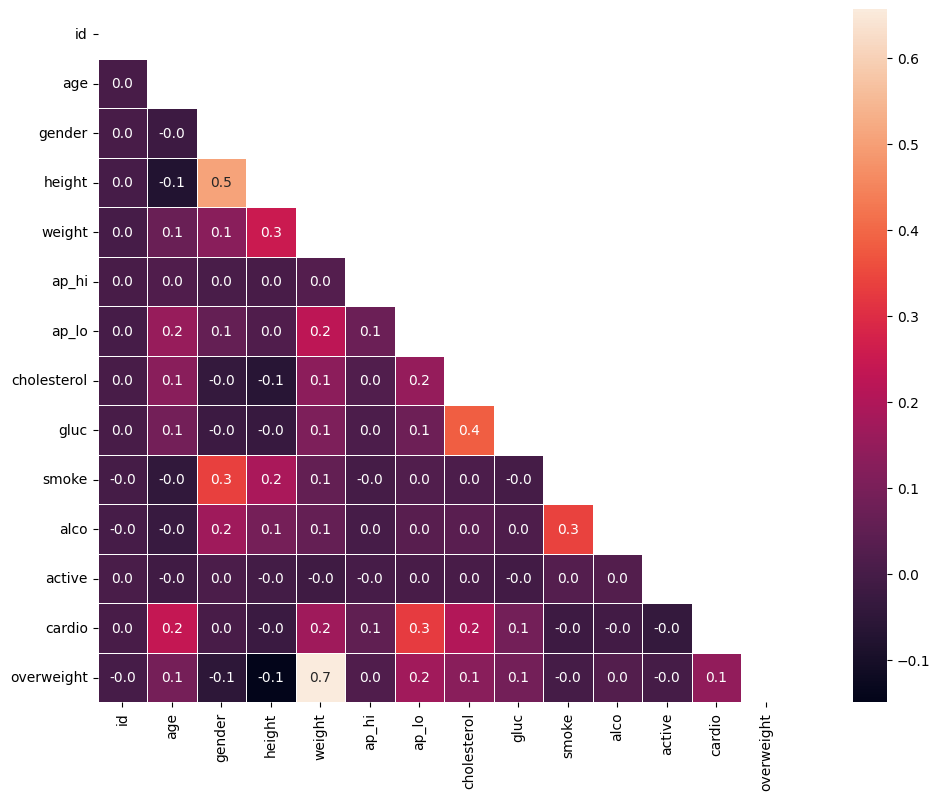

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
sb.heatmap(corre, mask=mask, square=True, linewidths=0.5, annot=True, fmt="0.1f")

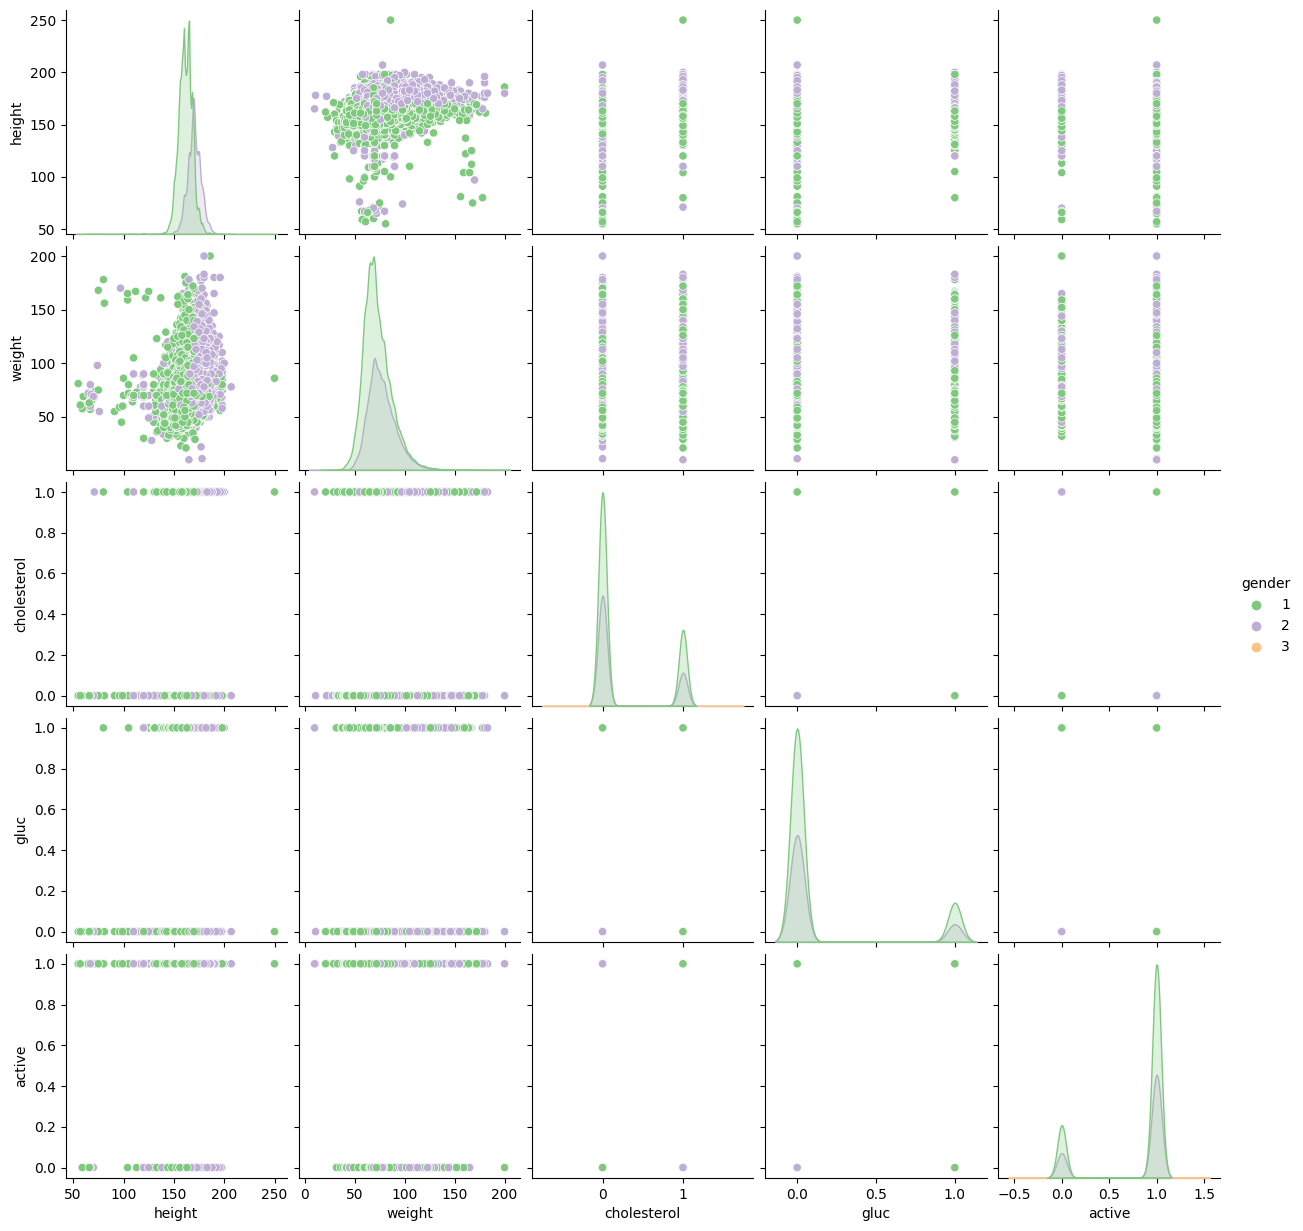

In [ ]:
gender_spec=med[['height','weight','cholesterol','gluc','active','gender']]
sb.pairplot(gender_spec, hue='gender', palette='Accent')

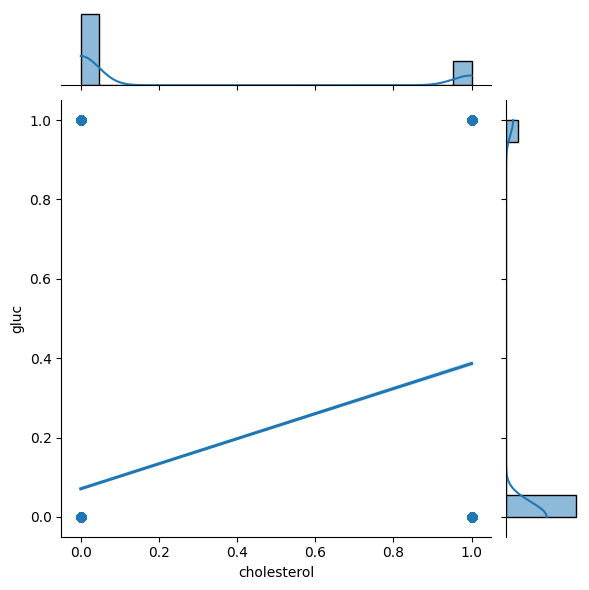

In [ ]:
sb.jointplot(x='cholesterol', y='gluc', data=med,kind='reg')